In [1]:
import pandas as pd
import numpy as np
import os
import re
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import glob
import pandas as pd
from sklearn.model_selection import train_test_split
from pycaret.classification import *
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.gridspec import GridSpec

# Descrição dos dados


Each feature or columns of different csv files are described below:

* The  `olist_customers_dataset.csv` contain following features:

Feature | Description 
----------|---------------
**customer_id** | Id of the consumer who made the purchase.
**customer_unique_id**    | Unique Id of the consumer.
**customer_zip_code_prefix** | Zip Code of the location of the consumer.
**customer_city** | Name of the City from where order is made.
**customer_state** |  State Code from where order is made(Ex- sao paulo-SP).

* The `olist_sellers_dataset.csv` contains following features:

Feature | Description 
----------|---------------
**seller_id** |   Unique Id of the seller registered in olist.
**seller_zip_code_prefix** | Zip Code of the location of the seller.
**seller_city** | Name of the City of the seller.
**seller_state** | State Code (Ex- sao paulo-SP)


* The `olist_order_items_dataset.csv`  contain following features:

Feature | Description 
----------|---------------
**order_id** | A unique id of order made by the consumers.
**order_item_id** | A Unique id given to each item ordered in the order.
**product_id** |A unique id given to each product available on the site.
**seller_id** | Unique Id of the seller registered in olist.
**shipping_limit_date** | The date before which shipping of the ordered    product must be completed.
**price** | Actual price of the products ordered .
**freight_value** | Price rate at which a product is delivered from one point to another. 

* The `olist_order_payments_dataset.csv` contain following features:

Feature | Description 
----------|---------------
**order_id** | A unique id of order made by the consumers.
**payment_sequential** | sequences of the payments made in case of EMI.
**payment_type** |  mode of payment used.(Ex-Credit Card)
**payment_installments** | number of installments in case of EMI purchase.
**payment_value** | Total amount paid for the purshase order.



* The `olist_orders_dataset.csv`  contain following features:

Feature | Description 
----------|---------------
**order_id** | A unique id of order made by the consumers.
**customer_id** | Id of the consumer who made the purchase.
**order_status** | status of the order made i.e delivered, shipped etc.
**order_purchase_timestamp** | Timestamp of the purchase.
**order_approved_at** | Timestamp of the order approval.
**order_delivered_carrier_date** | delivery date at which carrier made the delivery.
**order_delivered_customer_date** | date at which customer got the product.
**order_estimated_delivery_date** | estimated delivery date of the products.


* The `olist_order_reviews_dataset.csv`  contain following features:

Feature | Description 
----------|---------------
**review_id** |Id of the review given on the product ordered by the order id.
**order_id** |  A unique id of order made by the consumers.
**review_score** | review score given by the customer for each order on the scale of 1–5. 
**review_comment_title** | Title of the review
**review_comment_message** | Review comments posted by the consumer for each order.
**review_creation_date** |Timestamp of the review when it is created.
**review_answer_timestamp** | Timestamp of the review answered.


* The `olist_products_dataset.csv` contain following features:

Feature | Description 
----------|---------------
**product_id** | A unique identifier for the proposed project.
**product_category_name** | Name of the product category
**product_name_lenght** | length of the string which specify the name given to the products ordered.
**product_description_lenght** | length of the description written for each product ordered on the site.
**product_photos_qty** | Number of photos of each product ordered available on the shopping portal.
**product_weight_g** | Weight of the products ordered in grams.
**product_length_cm** | Length of the products ordered in centimeters.
**product_height_cm** | Height of the products ordered in centimeters.
**product_width_cm** | width of the product ordered in centimeters.






In [3]:
caminho = r'C:\Users\tchep\Downloads\Projeto-Final---Olist\Data'
lista = []
df = pd.DataFrame()

for f in os.listdir (caminho + "/"):
    if f != 'product_category_name_translation.csv':
        frames = pd.read_csv(caminho + "/" + f)
    df = df.append(frames, ignore_index= True)
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790.0,sao bernardo do campo,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151.0,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775.0,mogi das cruzes,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056.0,campinas,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(1553946, 44)

## Analisando dados

In [52]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790.0,sao bernardo do campo,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151.0,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775.0,mogi das cruzes,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056.0,campinas,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
seller_state,1547756,0.996017
seller_city,1547756,0.996017
seller_zip_code_prefix,1547756,0.996017
review_comment_title,1542378,0.992556
product_photos_qty,1521605,0.979188


In [54]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customer_zip_code_prefix,99441.0,35137.474583,29797.938996,1003.000000,11347.000000,24416.000000,58900.000000,99990.000000
geolocation_zip_code_prefix,1000163.0,36574.166466,30549.335710,1001.000000,11075.000000,26530.000000,63504.000000,99990.000000
geolocation_lat,1000163.0,-21.176153,5.715866,-36.605374,-23.603546,-22.919377,-19.979620,45.065933
geolocation_lng,1000163.0,-46.390541,4.269748,-101.466766,-48.573172,-46.637879,-43.767709,121.105394
order_item_id,112650.0,1.197834,0.705124,1.000000,1.000000,1.000000,1.000000,21.000000
price,112650.0,120.653739,183.633928,0.850000,39.900000,74.990000,134.900000,6735.000000
freight_value,112650.0,19.990320,15.806405,0.000000,13.080000,16.260000,21.150000,409.680000
payment_sequential,103886.0,1.092679,0.706584,1.000000,1.000000,1.000000,1.000000,29.000000
payment_installments,103886.0,2.853349,2.687051,0.000000,1.000000,1.000000,4.000000,24.000000
payment_value,103886.0,154.100380,217.494064,0.000000,56.790000,100.000000,171.837500,13664.080000


In [55]:
df.isna().sum()

customer_id                      1355064
customer_unique_id               1454505
customer_zip_code_prefix         1454505
customer_city                    1454505
customer_state                   1454505
geolocation_zip_code_prefix       553783
geolocation_lat                   553783
geolocation_lng                   553783
geolocation_city                  553783
geolocation_state                 553783
order_id                         1138745
order_status                     1454505
order_purchase_timestamp         1454505
order_approved_at                1454665
order_delivered_carrier_date     1456288
order_delivered_customer_date    1457470
order_estimated_delivery_date    1454505
order_item_id                    1441296
product_id                       1408345
seller_id                        1435106
shipping_limit_date              1441296
price                            1441296
freight_value                    1441296
payment_sequential               1450060
payment_type    

## Manipulação de valores ausentes

In [56]:
index = (df[df['order_delivered_customer_date'].isnull() == True].index.values)

df["order_approved_at"].fillna(df["order_purchase_timestamp"], inplace=True)
df["order_delivered_customer_date"].fillna(df["order_estimated_delivery_date"], inplace=True)

## Fazendo drop de colunas com numero elevado de nulos

In [57]:
df.drop(['seller_state', 'seller_city', 'seller_zip_code_prefix', 'review_comment_title', 'product_photos_qty'],axis=1, inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553946 entries, 0 to 1553945
Data columns (total 39 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   customer_id                    198882 non-null   object 
 1   customer_unique_id             99441 non-null    object 
 2   customer_zip_code_prefix       99441 non-null    float64
 3   customer_city                  99441 non-null    object 
 4   customer_state                 99441 non-null    object 
 5   geolocation_zip_code_prefix    1000163 non-null  float64
 6   geolocation_lat                1000163 non-null  float64
 7   geolocation_lng                1000163 non-null  float64
 8   geolocation_city               1000163 non-null  object 
 9   geolocation_state              1000163 non-null  object 
 10  order_id                       415201 non-null   object 
 11  order_status                   99441 non-null    object 
 12  order_purchase

In [59]:
df.shape

(1553946, 39)

## Formatação de colunas

A coluna de data precisa ser formatada. Utilizaremos o formato datetime extraindo os atributos de tempo dessas colunas

In [60]:
times_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date', 'order_delivered_customer_date']
for col in times_cols:
    df[col] = pd.to_datetime(df[col])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553946 entries, 0 to 1553945
Data columns (total 39 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   customer_id                    198882 non-null   object        
 1   customer_unique_id             99441 non-null    object        
 2   customer_zip_code_prefix       99441 non-null    float64       
 3   customer_city                  99441 non-null    object        
 4   customer_state                 99441 non-null    object        
 5   geolocation_zip_code_prefix    1000163 non-null  float64       
 6   geolocation_lat                1000163 non-null  float64       
 7   geolocation_lng                1000163 non-null  float64       
 8   geolocation_city               1000163 non-null  object        
 9   geolocation_state              1000163 non-null  object        
 10  order_id                       415201 non-null   objec

### Extraindo atributos para data de compra - Ano e Mês

Abaixo converteremos um  datetime objeto contendo data e hora atuais para diferentes formatos.

In [62]:
df['order_purchase_timestamp'].describe()

count                   99441
unique                  98875
top       2018-04-11 10:48:14
freq                        3
first     2016-09-04 21:15:19
last      2018-10-17 17:30:18
Name: order_purchase_timestamp, dtype: object

In [81]:
df['order_purchase_year'] = df['order_purchase_timestamp'].apply(lambda x: x.year)
df['order_purchase_month'] = df['order_purchase_timestamp'].apply(lambda x: x.month)
df['order_purchase_month_name'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%b') if x==x else x )
df['order_purchase_year_month'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
df['order_purchase_date'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

ValueError: NaTType does not support strftime

In [64]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_purchase_year,order_purchase_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790.0,sao bernardo do campo,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151.0,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775.0,mogi das cruzes,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056.0,campinas,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Verificando dados Cidade

Podemos ver que não há valor nulo no conjunto de dados dos Clientes (Customers)

AgTentaremos encontrar dados de estado e cidade únicos no Conjunto de Dados de Clientes

In [65]:
df.customer_city.unique()

array(['franca', 'sao bernardo do campo', 'sao paulo', ..., 'sao rafael',
       'eugenio de castro', nan], dtype=object)

In [66]:
len(df.customer_city.unique())

4120

## Verificando dados Estados

In [67]:
df.customer_state.unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR', nan], dtype=object)

In [68]:
len(df.customer_state.unique())

28

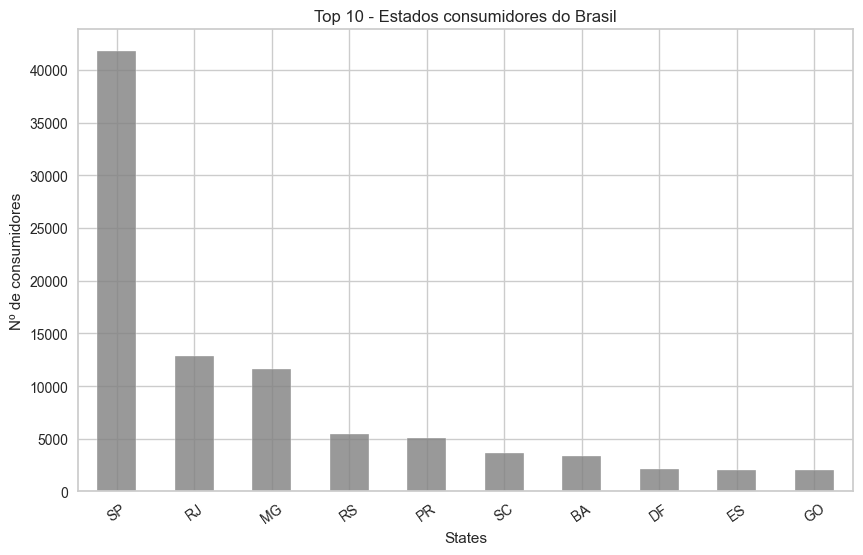

In [80]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
ax = df.customer_state.value_counts().sort_values(ascending=False)[0:10].plot(kind='bar', color = 'grey', alpha=0.8)
ax.set_title("Top 10 - Estados consumidores do Brasil")
ax.set_xlabel("States")
plt.xticks(rotation=35)
ax.set_ylabel("Nº de consumidores")
plt.show()

## Categoria de produto mais comprada 

No banco de dados contam 71 categorias diferentes. Nesta pimeira etapa vamos excluir as duplicatas de dados utilizando como base o 'customer_unique_id' e o 'customer_city'

In [72]:
top_10_cities=df['customer_city'].value_counts().nlargest(10)
top_10_cities

sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_city, dtype: int64

### Por cidade

In [73]:
cities=df['customer_city'].value_counts(ascending=True)
cities[0:20]

eugenio de castro     1
monteiropolis         1
campo florido         1
alto sao joao         1
paulistania           1
taquarana             1
castanheiras          1
humberto de campos    1
nova brescia          1
chaval                1
curralinho            1
tocos do moji         1
marilac               1
rio doce              1
chiapetta             1
tapera                1
suzanapolis           1
monte belo do sul     1
lagoa do piaui        1
riversul              1
Name: customer_city, dtype: int64

In [ ]:
cidade = df["customer_city"].nunique()
c1 = df.groupby('customer_city')['customer_id'].nunique().sort_values(ascending=False)
c2 = c1.head(10)
print(c2)
round(c2.sum()/df.shape[0]*100,1) #% de pedidos pelas top 10 cidades
c2.plot(kind="bar")

In [ ]:
df = df.drop_duplicates(subset=["customer_unique_id"])
df["customer_city"] = df["customer_city"].str.capitalize()
df.head()

In [ ]:
clientes_por_cidade = df.groupby("customer_city").count()["customer_unique_id"].reset_index().sort_values(by="customer_unique_id",ascending=False).head(10)
clientes_por_cidade.rename(columns = {"customer_unique_id":"total"}, inplace=True)
clientes_por_cidade

### Por Estado

In [ ]:
clientes_por_estado = df.groupby(["customer_state"]).count()["customer_unique_id"].reset_index().sort_values(by="customer_unique_id",ascending=False).head(10)
clientes_por_estado.rename(columns = {"customer_unique_id":"total"}, inplace=True)
clientes_por_estado

In [ ]:
Supermecado, Tecnologia, Casa e Moveis, Eletrodomesticos, Esportes, Ferramentas, Construção, Industria e Comercio
Saude, Beleza e Perfumaria, Moda, Bebes, Brinquedos, Papelaria, Pet Shop, Mala, Mochila e Acessórios, Seguro e Servicos, Decoracao


